# Pyber Ride Sharing
# Analysis
Observed Trend 1: Rides in Urban city types tend to be much cheaper and more frequent than in Suburban or Rural areas.

Observed Trend 2: There are more drivers in urban areas than there are in rural or suburban areas.

Observed Trend 3: Average fares in rural areas tend to range from the highest and lowest averages for all types of cities.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
#Merge data into one set in order to incorporate city type and driver count into the ride sharing data.
ride_sharing_data = pd.read_csv("raw_data/ride_data.csv")
driver_data = pd.read_csv("raw_data/city_data.csv")
merged_data = pd.merge(ride_sharing_data, driver_data, on="city", how="left")

merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [18]:
#Filtered data for only City Type is Urban in order to create three separate scatter plots (one for Urban,
# one for Suburban, and one for Local) 
urban_data = merged_data.loc[merged_data["type"] == "Urban"]

group_urban_data = urban_data.groupby("city")

urban_average_fare = group_urban_data["fare"].mean()
urban_total_rides = group_urban_data["ride_id"].count()
urban_driver_count = group_urban_data["driver_count"].sum()/group_urban_data["driver_count"].count()

#Set dataframe to check/review data in table form
df = pd.DataFrame({
    "Average Rate": urban_average_fare,
    "Total Rides": urban_total_rides,
    "Driver Count": urban_driver_count
})

df.head()

,Average Rate,Driver Count,Total Rides
city,,,
Alvarezhaven,23.928710,21.0,31
Alyssaberg,20.609615,67.0,26
Antoniomouth,23.625000,21.0,22
Aprilchester,21.981579,49.0,19
Arnoldview,25.106452,41.0,31


In [19]:
suburban_data = merged_data.loc[merged_data["type"] == "Suburban"]

group_suburban_data = suburban_data.groupby("city")

suburban_average_fare = group_suburban_data["fare"].mean()
suburban_total_rides = group_suburban_data["ride_id"].count()
suburban_driver_count = group_suburban_data["driver_count"].sum()/group_suburban_data["driver_count"].count()

In [20]:
rural_data = merged_data.loc[merged_data["type"] == "Rural"]

group_rural_data = rural_data.groupby("city")

rural_average_fare = group_rural_data["fare"].mean()
rural_total_rides = group_rural_data["ride_id"].count()
rural_driver_count = group_rural_data["driver_count"].sum()/group_rural_data["driver_count"].count()

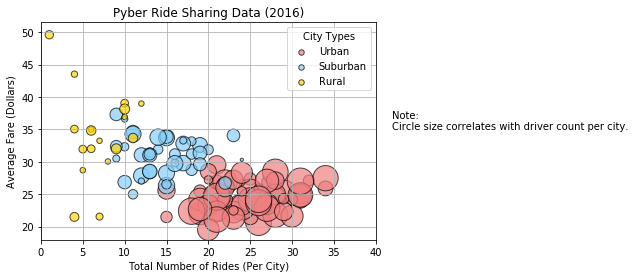

In [21]:
#Bubble Plot of Ride Sharing Data (Urban)
#Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)

plt.scatter(urban_total_rides, urban_average_fare, s=10*urban_driver_count, c="lightcoral", alpha=0.7, linewidth=1, marker="o", edgecolors="black", label="Urban")
plt.scatter(suburban_total_rides, suburban_average_fare, s=10*suburban_driver_count, c="lightskyblue", alpha=0.7, linewidth=1, marker="o", edgecolors="black", label="Suburban")
plt.scatter(rural_total_rides, rural_average_fare, s=10*rural_driver_count, c="gold", alpha=0.7, linewidth=1, marker="o", edgecolors="black", label="Rural")

lgnd = plt.legend(loc="upper right", title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare (Dollars)")

plt.xlim((0,40))
plt.grid(True)
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

plt.savefig("Fig1.png")

plt.show()

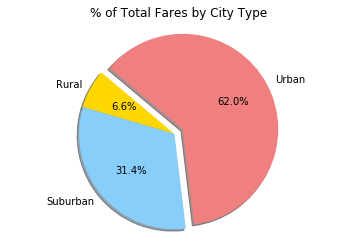

In [22]:
#Total Fares by City Type
grouped_city = merged_data.groupby("type")

total_city = grouped_city["fare"].sum()
total_city

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0,0,0.1]
plt.pie(total_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.savefig("Fig2.png")
plt.show()

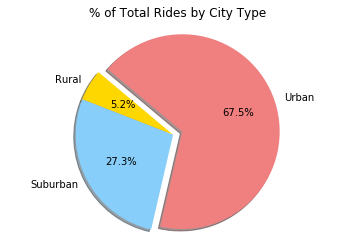

In [23]:
#Total Rides by City Type
grouped_city = merged_data.groupby("type")

rides_city = grouped_city["ride_id"].count()
rides_city.head()

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0,0,0.1]
plt.pie(rides_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.savefig("Fig3.png")
plt.show()

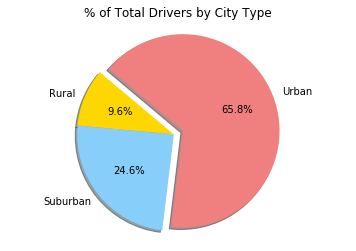

In [24]:
#Total Drivers by City Type
grouped_city = merged_data.groupby("type")

drivers_city = grouped_city["driver_count"].sum()/grouped_city["driver_count"].count()
drivers_city.head()

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0,0,0.1]
plt.pie(drivers_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.savefig("Fig4.png")
plt.show()